In [1]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set(color_codes=True)

import numpy as np
import pandas as pd
#import itertools

import logging
logger = logging.getLogger()

2 Overview of Supervised Learning
==================

### 2.1 Introduction
Input: predictor, independent variable, feature

Output: responses, dependent variable

supervised learning

### 2.2 Variable Types and Terminology

#### variable type
+ quantitative:      
  eg: $x \in [0, 10]$     
  regression

+ qualitative: categorical variable, discrete variable, factor.    
  eg: $x \in \{0, 1, \dotsc, 10\}$     
  classification     
  
  represented numerically by codes: dummy variables.
  
+ ordered categorical:      
  eg: $x \in \{\text{small, medium, large}\}$     
  there is an ordering between the values, but no metric notion is appropriate.
  
#### terminology
1. All vectors are assumed to be *column vectors*.

2. Input:
   + vector: $X$
   
   + matrice: $\mathbf{X}$
    \begin{align}
        \mathbf{X}_{N \times p} &= \begin{bmatrix}
                                        X_0 & \cdots & X_j & \cdots & X_p
                                   \end{bmatrix} \\
                                &= \begin{bmatrix}
                                        x_0^T \\ 
                                        \vdots \\
                                        x_i^T \\
                                        \vdots \\
                                        x_N^T
                                   \end{bmatrix}
    \end{align}

3. Output:     
   quantitative outputs: $Y$       
   qualitative outputs: $G$
   
4. Prediction:      
   $\hat{Y}$, $\hat{G}$
   
5. training data: $\{(x_i, y_i) \, | \, x_i \in M, y_i \in Y\}$ or $\{(x_i, g_i)\}$

### 2.3 Two Simple Approaches to Prediction: Least Squares and Nearest Neighbors

#### 2.3.1 Linear Models and Least Squares
Given: $X^T = (X_1, X_2, \dotsc, X_p)$     
Predict: $$\hat{Y} = \hat{\beta}_0 + \displaystyle \sum_{j=1}^p X_j \hat{\beta}_j$$.

if $X^T = (1, X^T)$, then $\hat{Y} = X^T \hat{\beta}$.

residual sum of squares: $$\text{RSS} (\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta)$$

Goal: $$\text{arg min} \text{ RSS}(\beta)$$

So differentiating w.r.t $\beta$ we get the *normal equations*:    
\begin{align}
   \frac{\mathrm{d}}{\mathrm{d} \beta} \text{RSS} (\beta) &= 0 \\  
   \mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta) &= 0
\end{align}
If $\mathbf{X}^T \mathbf{X}$ is nonsingular, then the unique solution is given by 
$$\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [2]:
from sklearn import datasets, linear_model

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [4]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
print('intercept: {}, coef: {}'.format(regr.intercept_, regr.coef_))

intercept: 152.91886182616167, coef: [ 938.23786125]


In [122]:
df = pd.DataFrame(
    {
        'x_0': 1,
        'x_1': np.array(diabetes_X_train).flatten(),
        'y': np.array(diabetes_y_train).flatten()
    }
)

In [123]:
X = np.matrix(df.loc[:, ['x_0', 'x_1']])
Y = np.matrix(df.loc[:, 'y']).T

In [128]:
beta = (X.T * X).I * X.T * Y
beta

matrix([[ 152.91886183],
        [ 938.23786125]])

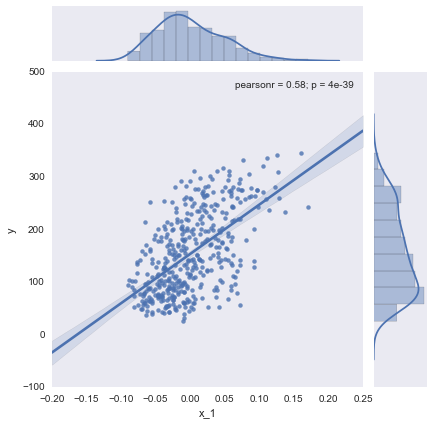

In [127]:
sns.jointplot(x='x_1', y='y', data=df, kind='reg')

#### 2.3.2 Nearest-Neighbor Methods
The $k$-nearest neighbor fit for $\hat{Y}$ is defined as follows:
$$\hat{Y}(x) = \frac{1}{k} \displaystyle \sum_{x_i \in N_k(x)} y_i$$
where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

In words, we find the $k$ observations with $x_i$ closest to $x$ in input space, and average their responses.

##### 2.3.3 From Least Squares to Nearest Neighbors
The linear model makes huge assumptions about structure and yields stable but possibly inaccurate predictions.     
The method of $k$-nearest neighbors makes very mild structural asumptions: its predictions are often accurate but can be unstable.

| | variance | bias |
|---|--------|-------|
|Least Squares| low | high |
|Nearest Neighbors| high | low|

Each method has its own situations for which it works best:

+ Scenario 1: linear regression     
  The training data in each class were generated from bivariate Gaussian distributions with uncorrected components and different means.
  
+ Scenario 2: nearest neighbors      
  The training data in each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian.

A large subset of the most popular techniques in use today are variants of these two simple procedures. The following list describes some ways in which these simple procedures have been enhanced:

+ Kernel method: weight $[0,1] \to (0,1)$

+ In high-dimensional spaces: distance kernels are modified.

+ Local regression: fits linear models in local.

+ Linear models: basis expansion of the original inputs.

+ Projection pursuit and neural network models: sum of non-inearly transformed linear models.

In [93]:
from sklearn.utils import resample
np.random.seed(1)
m_b = np.random.multivariate_normal([1,0], np.eye(2), 10)
m_r = np.random.multivariate_normal([0,1], np.eye(2), 10)

In [94]:
s_b = [np.random.multivariate_normal(m_b[x,:], 1/5*np.eye(2), 1) for x in np.random.choice(m_b.shape[0], 100)]
s_b = pd.DataFrame(np.array([x[0,:] for x in s_b]), columns=['x_1', 'x_2'] )

In [95]:
s_r = [np.random.multivariate_normal(m_r[x,:], 1/5*np.eye(2), 1) for x in np.random.choice(m_r.shape[0], 100)]
s_r = pd.DataFrame(np.array([x[0,:] for x in s_r]), columns=['x_1', 'x_2'] )

In [96]:
sample = pd.concat([s_b, s_r], keys=[0, 1], axis=0, names=['color', 'ind'])
sample = sample.reset_index(level=[0], col_fill=['color'])

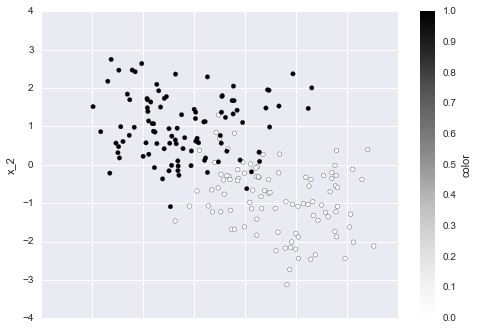

In [97]:
sample.plot(kind='scatter', x='x_1', y='x_2', c='color')

### 2.4 Statistical Decision Theory
*loss function*: penalize errors in prediction.      

#### L2 loss function
by far the most common and convenient loss function is *squared error loss**: $$L(Y, f(X)) = (Y - f(X))^2$$

This leads us to a crition for choosing $f$,
\begin{align}
    \text{EPE}（f) &= E(Y - f(X))^2 \\
                   &= E_{X} E_{Y|X} ([Y - f(X)]^2 | X)
\end{align}

and we see that it sufficies to minimize EPE pointwise:
\begin{align}
    f(x) &= \text{arg min}_{c} E_{Y|X}([Y - c]^2 | X = x) \\
         &= E(Y | X = x)
\end{align}
Thus the best prediction of $Y$ at any point $X=x$ is the conditional mean, when best is measured by average squared error.

##### The nearest-neighbor methods
They attempt to directly implement this recipe using the training data:
$$\hat{f} = \text{Ave}(y_i | x_i \in N_{k}(x))$$

Two approximations are happening here:

+ expectation is approximated by averaging over sample data;

+ conditioning at a point is relaxed to conditioning on some region "close" to the target point.

##### Linear regression
\begin{align}
    \text{EPE}（f) &= E(Y - f(X))^2 \\
                   &= E(Y - X^{T} \beta)^2 \\
\end{align}

We solve for $\beta$ theoretically:
$$\beta = [E(X X^T)]^{-1} E(XY)$$
The least squares solution:
$$\hat{\beta} = (X^T X)^{-1} X^Ty$$
amounts to replacing the expectation by averages over the traing data.

##### comprasion
common in method:     

+ both $k$-nearest neighbors and least squares end up approximating conditional expectations by averages.


different in model assumptions:    

+ Least squares assumes $f(x)$ is well approximated by a globally linear function.

+ $k$-nearest neighbors assumes $f(x)$ is well approximated by a locally constant function.


#### L1 loss function
for $L_1: E|Y - f(X)|$, the solution of the nearest neighbor is the conditional median,
$$\hat{f}(x) = \text{median}(Y | X=x)$$
and its estimates are more robust than those for the conditional mean.

$L_1$ criteria have discontinuities in their derivatives, which have hindered their widespread use.


#### for categorical variable
An estimate $\hat{G}$ will assume values in $\mathcal{G}$, the set of possible classes.

Our loss function can be represented by a $K \times K$ matrix $\mathbf{L}$, where $K = \text{card}(G)$. $\mathbf{L}$ will be zero on the diagonal and nonnegative elsewhere. 

Most often we use the *zero-one* loss function, and the expected prediction error is 
\begin{align}
    \text{EPE} &= E(L(G, \hat{G}(x))] \\
               &= E_x \displaystyle \sum_{k=1}^{K} L[\mathcal{G}_k, \hat{G}(X)] \text{ Pr}(\mathcal{G}_k | X)
\end{align}

and again it sufficies to minimize EPE pointwise:
\begin{equation}
    \hat{G}(x) = \text{argmin}_{g \in \mathcal{G}} \displaystyle \sum_{k=1}^{K} L(\mathcal{G}_{k,g}) \text{ Pr}(\mathcal{G}_k | X = x)
\end{equation}

With the 0-1 loss function this simplifies to 
\begin{align}
    \hat{G}(x) &= \text{argmin}_{g \in \mathcal{G}} [1 - \text{ Pr}(g | X = x)] \\
               &= \text{argmax}_{g \in \mathcal{G}} \text{ Pr}(g | X = x)
\end{align}
The reasonal solution is known as the *Bayes classfier*: classify to the most probable class, using the conditional (discrete) distribution $\text{Pr}(G | X)$. The error rate of the Bayes classifier is called the *Bayes rate*.

### 2.5 Local Methods in High Dimensions
*curse of dimensionality*

#### a. Non-Local issue of sparse sampling in high dimensions
Suppose in $p$-dimensional space, we sned out a hypercubical neighborhood about a target point to capture a fraction $r$ of the observations, whose expected edge length will be $e_p(r) = r^{1/p}$.

$e_{10}(0.01) = 0.63$ and $e_{10}(0.1) = 0.8$, while the entire range for each input is only 1.0. Such neighborhoods are no longer "local".

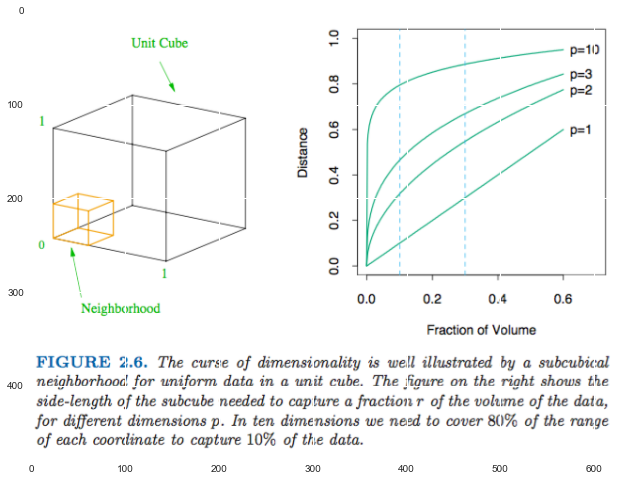

In [3]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./res/fig2_6.png'))

#### b-1. all sample points are close to an edge of the sample when sparse sampling in high dimensions
Consider $N$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin. 

The median distance from the origin to the closest data point is:
$$d(p,N) = (1 - (\frac{1}{2})^{1/N})^{1/p}$$

For $N = 500, p = 10$, $d(p,N) \approx 0.52$, more than halfway to the boundary. Prediction, however, is much more difficult near the edges of the training sample.

#### b-2. another manifestation of the curse is that the sampling density is proportional to $N^{1/p}$.
For the same sampling density with $N_1 = 100$, $N_{10} = 100^{10}$. Thus, in high  dimensions all feasible training samples sparsely populate the input space.

##### e.g. 1-nearest-neighbor (bias domination)
Suppose we have a training set $\tau$ consisting of 1000 training examples $x_i$ which generated uniformly on $[-1,1]^p$. and $Y = f(X) = e^{-8 \|X\|^2}$.

For estimating $f(0)$ by *bias-variance decomposition*:    
\begin{align}
    MSE(x_0) &= E_{\tau} [f(x_0) - \hat{y}_0]^2 \\
             &= E_{\tau} [\hat{y}_0 - E_{\tau}(\hat{y}_0)]^2 + [E_{\tau}(\hat{y}_0 - f(x_0)]^2 \\
             &= \text{Var}_{\tau} (\hat{y}_0) + \text{Bias}^2 (\hat{y}_0)
\end{align}

As $p$ increases, the nearest neighbor tends to stray further from the target point, and both bias and variance are incurred.

The complexity of functions of *many variables* can grow exponentially with the dimension.

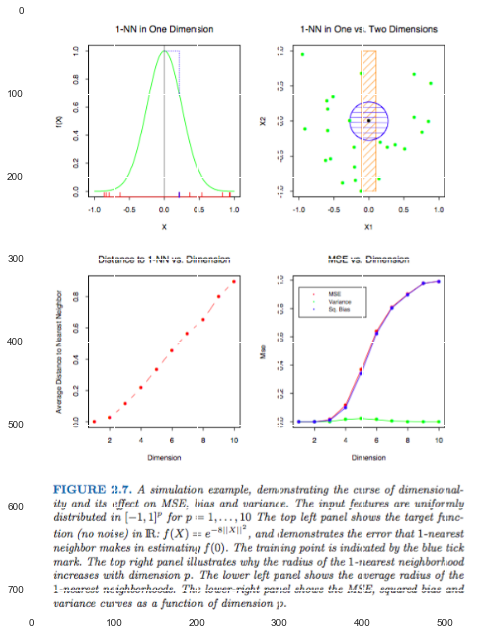

In [7]:
plt.figure(figsize=(8,15))
plt.imshow(plt.imread('./res/fig2_7.png'))

##### e.g. least squares (variance domination)
Suppose $Y = X^T \beta + \varepsilon$ where $\varepsilon \in N(0, \sigma^2)$.

\begin{align}
    \text{EPE}(x_0) &= E_{y_0 | x_0} E_{\tau}(y_0 - \hat{y}_0)^2 \\
    &= \text{Var}(y_0 | x_0) + E_{\tau}[\hat{y}_0 - E_{\tau}\hat{y}_0]^2 + [E_{\tau}\hat{y}_0 - x_0^T \beta]^2 \\
    &= \text{Var}(y_0 | x_0) + \text{Var}_{\tau}(\hat{y}_0) + \text{Bias}^2(\hat{y}_0) \\
    &= \sigma^2 + E_{\tau} x_0^T (\mathbf{X}^T \mathbf{X})^{-1} x_0 \sigma^2 + 0^2
\end{align}

If $N$ is large and $\tau$ were selected at random, and assuming $E(X) = 0$, then $\mathbf{X}^T \mathbf{X} \to N \text{Cov}(X)$ and      
\begin{align}
    E_{x_0} \text{EPE}(x_0) &\sim E_{x_0} x_0^T \text{Cov}(X)^{-1} x_0 \sigma^2 / N + \sigma^2 \\
    &= \text{trace} [\text{Cov}(X)^{-1} \text{Cov}(x_0)] \sigma^2 / N + \sigma^2 \\
    &= \sigma^2 (p / N) + \sigma^2 
\end{align}

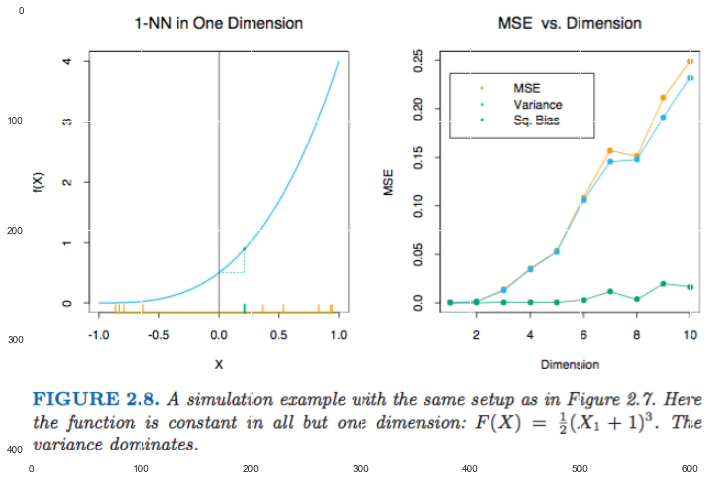

In [9]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./res/fig2_8.png'))

### 2.6 Statistical Models, Supervised Learning and Function Approximation
We discuss a framework for incorporating various modes into the prediction problem.

#### 2.6.1 A Statistical Model for the Joint Distribution $\text{Pr} (X, Y)$
additive error model:
$$Y = f(X) + \epsilon$$
where $E(\epsilon) = 0$ and is independent of $X$. Hence, $f(x) = E(Y | X = x)$.

For 0-1 coded version of $G$, whose data arise from independent binary trials, with the probability of one particular outcome being $p(X)$, and the other $1 - p(X)$.
\begin{align}
    E(Y | X = x) &= p(x) \\
    \text{Var}(Y | X = x) &= E(Y^2 | X = x) - E^2(Y | X = x) \\
                          &= p(x) - p^2(x)
\end{align}

#### 2.6.2 Supervised Learning
learning by example

#### 2.6.3 Function Approximation
The goal of learning is to obtain a useful approximation to $f(x)$ in $p+1$-dimensional space for $X \in \mathbb{R}^{p}$.

1. Linear basis expansions:      
   $$f_{\theta}(x) = \displaystyle \sum_{k=1}^K h_k(x) \theta_k$$
    where the $h_k$ are a suitable set of functions or transformations of the input vector $x$.

   We find the $\theta$ in $f_\theta$ by minimizing the $\text{RSS}(\theta)$.
   
2. maximum likelihood estimation:       
   $$L_(\theta) = \displaystyle \sum_{i=1}^{N} \log \text{Pr}_{\theta}(y_i)$$

### 2.7 Structured Regression Models
intorduces classes of structured approaches.

$$\text{RSS}(f) = \displaystyle \sum_{i=1}^{N} (y_i - f(x_i))^2$$
for infinite $N$, $f \to$ limiting conditional expection.

for finite $N$, many solutions. $\to$ add constraints, one solution.       
The strength of the constraint is dictated by:

+ the neighbor size.

+ the metric used.

Any method that attempts to produce locally varing functions in small isotropic neighborhoods will run into problems in high dimensions.      
And conversely, all methods that overcome the dimensionality problems have an associated metric for measuring neighborhoods, which basically dose NOT allow the neighborhood to be simultaneously small in all directions.

### 2.8 Classes of Restricted Estimators
classify nonparametric regression techniques

#### 2.8.1 Roughness Penalty and Bayesian Methods
$$\text{PRSS}(f; \lambda) = \text{RSS}(f) + \lambda J(f)$$

Penalty function, or *regularization* methods, exhibits a certain type of smooth behavior, and indeed can usually *be cast in a Bayesian framework*:

+ The penalty $J$ corresponds to a log-prior, and $\text{PRSS}(f; \lambda)$ the log-posterior distribution, and minimizing $\text{PRSS}(f; \lambda)$ amounts to finding the posterior mode.

#### 2.8.2 Kernel Methods and Local Regression
They provides estimates by secifying the nature of the local neighborhood, and of the class of regular functions fitted locally.

In general we can define a local regression estimate of $f(x_0)$ as $f_{\hat{\theta}}(x_0)$, where $\hat{\theta}$ minimizes
$$\text{RSS}(f_{\theta}, x_0) = \displaystyle \sum_{i=1}^N K_\lambda(x_0, x_i) (y_i - f_\theta(x_i))^2$$

#### 2.8.3 Basis Functions and Dictionary Methods
The model for $f$ is a linear expansion of basis functions
$$f_\theta(x) = \displaystyle \sum_{m=1}^M \theta_m h_m(x)$$

eg: radial basis functions, neural network

dictory methods: adaptively chosen basis function methods.

### 2.9 Model Selection and the Bias-Variance Tradeoff

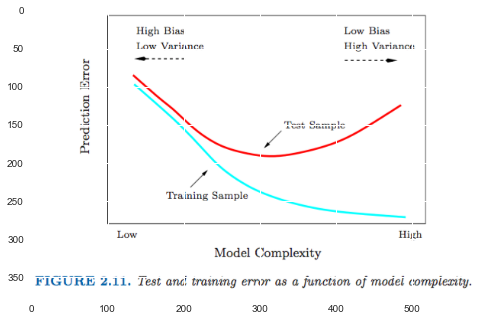

In [2]:
plt.imshow(plt.imread('./res/fig2_11.png'))